Dataset loaded successfully!
  userName  userImage          content  score  thumbsUpCount  \
0   User_0        NaN             Good      5              0   
1   User_1        NaN             Nice      5              0   
2   User_2        NaN  Very convenient      5              0   
3   User_3        NaN             Good      4              0   
4   User_4        NaN         exllence      5              0   

  reviewCreatedVersion                   at replyContent repliedAt  \
0          4.556.10005  2024-12-18 17:17:19          NaN       NaN   
1          4.556.10005  2024-12-18 17:17:17          NaN       NaN   
2          4.532.10001  2024-12-18 17:09:42          NaN       NaN   
3          4.556.10005  2024-12-18 17:08:27          NaN       NaN   
4          4.556.10005  2024-12-18 17:08:16          NaN       NaN   

    appVersion  
0  4.556.10005  
1  4.556.10005  
2  4.532.10001  
3  4.556.10005  
4  4.556.10005  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries

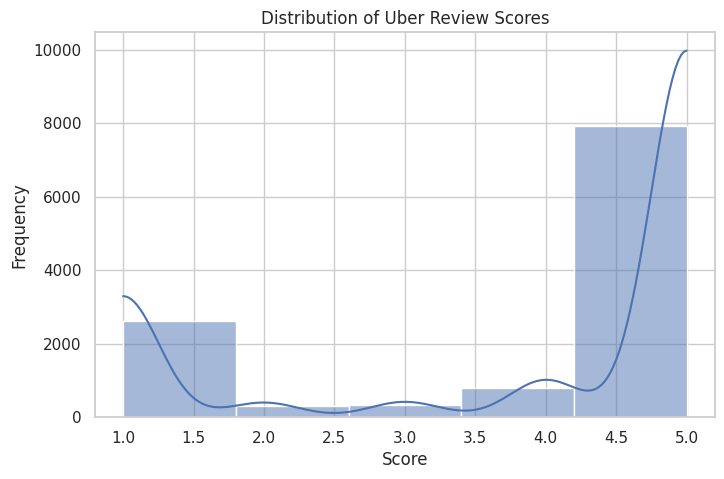

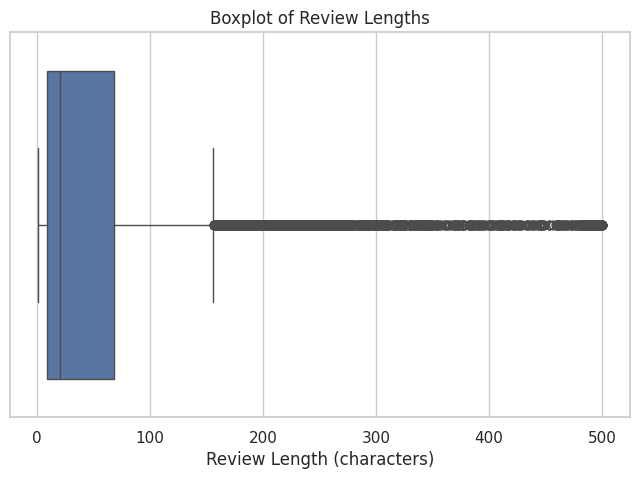

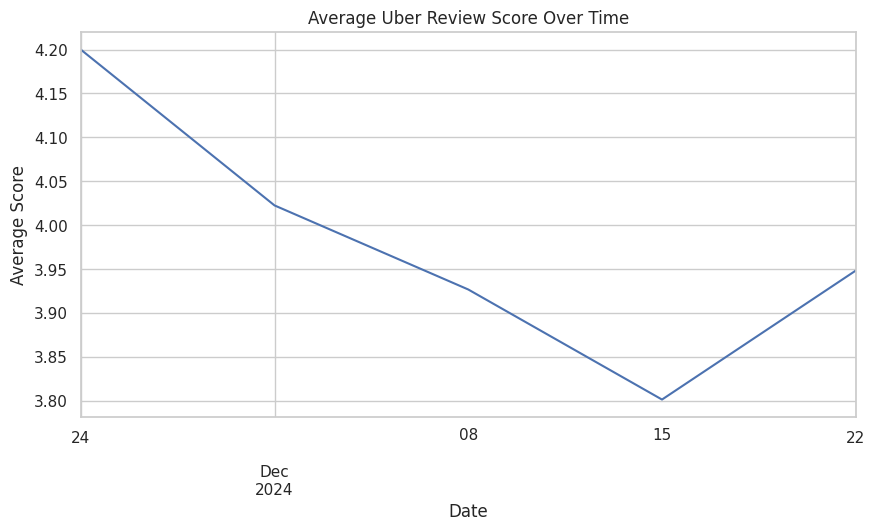

Correlation Matrix:
                  score  Review_Length
score          1.000000      -0.576727
Review_Length -0.576727       1.000000


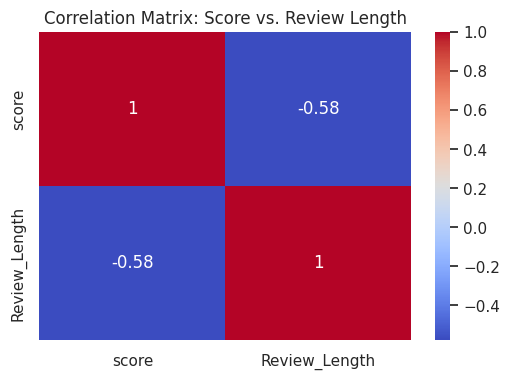

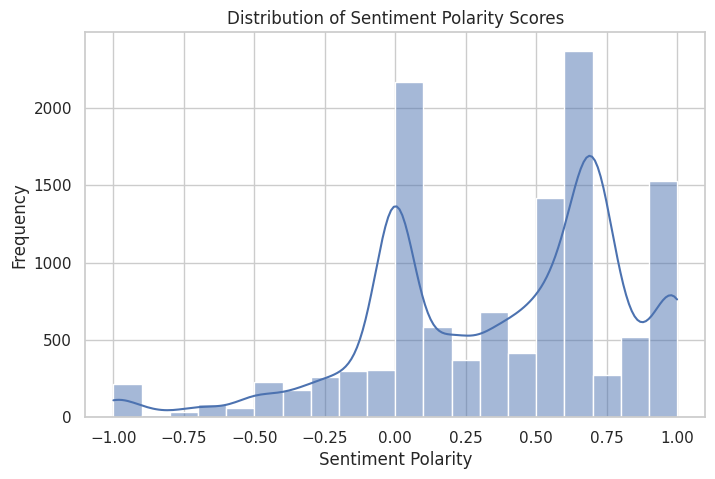

Cluster counts:
Cluster
4    8888
3    2189
1     492
2     420
0      11
Name: count, dtype: int64


<ipython-input-7-5cb1d182414b>:94: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




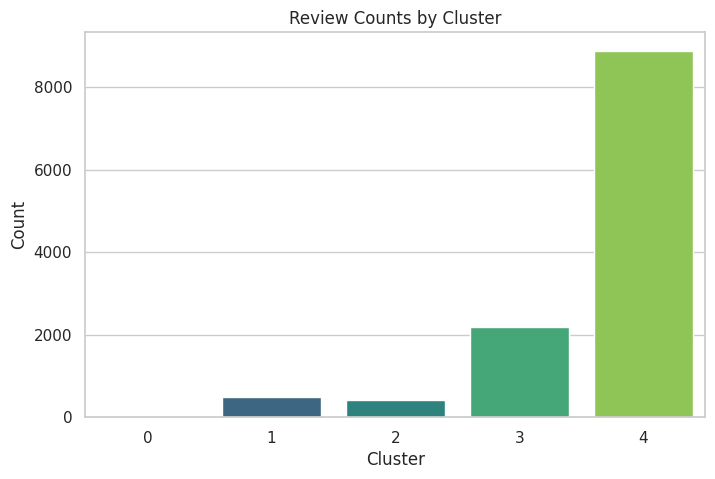

<ipython-input-7-5cb1d182414b>:111: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.



In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, show, output_notebook
output_notebook()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from textblob import TextBlob


sns.set(style="whitegrid")


df = pd.read_csv('uber_reviews.csv')
print("Dataset loaded successfully!")
print(df.head())
print(df.info())
print("Missing values per column:")
print(df.isnull().sum())


df.dropna(subset=['content', 'score'], inplace=True)


if 'at' in df.columns:
    df['at'] = pd.to_datetime(df['at'])

df['Review_Length'] = df['content'].apply(lambda x: len(x))



print("Summary statistics:")
print(df.describe())
print("Score value counts:")
print(df['score'].value_counts())


plt.figure(figsize=(8, 5))
sns.histplot(df['score'], bins=5, kde=True)
plt.title('Distribution of Uber Review Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Review_Length'])
plt.title('Boxplot of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.show()


if 'at' in df.columns:
    df.set_index('at', inplace=True)
    avg_score = df['score'].resample('W').mean()
    plt.figure(figsize=(10, 5))
    avg_score.plot()
    plt.title('Average Uber Review Score Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Score')
    plt.show()
    df.reset_index(inplace=True)
corr_matrix = df[['score', 'Review_Length']].corr()
print("Correlation Matrix:")
print(corr_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Score vs. Review Length')
plt.show()


df['Sentiment'] = df['content'].apply(lambda review: TextBlob(review).sentiment.polarity)
plt.figure(figsize=(8, 5))
sns.histplot(df['Sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['content'])

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(tfidf_matrix)
print("Cluster counts:")
print(df['Cluster'].value_counts())


plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Review Counts by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


fig = px.histogram(df, x='score', color='Cluster',
                   title='Interactive Histogram of Scores by Cluster',
                   labels={'score': 'Review Score'})
fig.show()


p = figure(title="Review Length vs Score",
           x_axis_label='Review Length (characters)',
           y_axis_label='Score',
           width=700, height=400)
p.circle(df['Review_Length'], df['score'], size=8, color="navy", alpha=0.6)
show(p)


